<a href="https://colab.research.google.com/github/angelmorenocalvo/taller_TensorFlow/blob/master/MNIST_CONV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [0]:
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
__________

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images,test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.0398 - acc: 0.9884 - val_loss: 0.0685 - val_acc: 0.9847
Epoch 2/20
60000/60000 [==============================] - 16s 265us/step - loss: 0.0360 - acc: 0.9899 - val_loss: 0.0786 - val_acc: 0.9837
Epoch 3/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.0348 - acc: 0.9906 - val_loss: 0.0782 - val_acc: 0.9839
Epoch 4/20
60000/60000 [==============================] - 17s 280us/step - loss: 0.0317 - acc: 0.9919 - val_loss: 0.1122 - val_acc: 0.9815
Epoch 5/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.0327 - acc: 0.9920 - val_loss: 0.0871 - val_acc: 0.9857
Epoch 6/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.0294 - acc: 0.9929 - val_loss: 0.1141 - val_acc: 0.9826
Epoch 7/20
60000/60000 [==============================] - 17s 283us/step - loss: 0.0310 - acc: 0.9931 - val_loss: 0.

In [0]:
import matplotlib.pyplot as plt

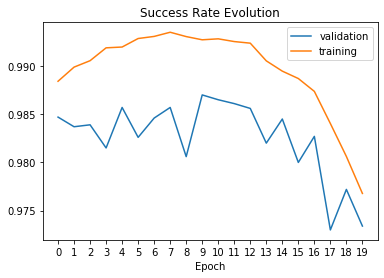

In [0]:
plt.plot(history.epoch, history.history['val_acc'], label='validation')
plt.plot(history.epoch, history.history['acc'], label='training')
plt.legend()
plt.title('Success Rate Evolution')
plt.xlabel('Epoch')
plt.xticks(history.epoch)
plt.show()